In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

## A Model about Random Selection: Swain vs. Alabama

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [2]:
# Create an array with 26% black and 74% non black
eligible_population = make_array(0.26, 0.74)

In [3]:
# There were 100 jurors to be selected in 1965 for the Swain V. Alabama case
sample_proportions(100, eligible_population)

array([0.21, 0.79])

In [4]:
# Convert the above count by multiplying by 100
both_counts = 100 * (sample_proportions(100, eligible_population))
both_counts

array([26., 74.])

In [5]:
counts = []

iterations = 10000
for i in np.arange(iterations):
    sample_distribution = sample_proportions(100, eligible_population)
    # The count of black men
    sampled_count = 100 * sample_distribution[0]
    counts.append(sampled_count)

round(np.mean(counts))   # From the above simulation, the average is about 26%

26.0

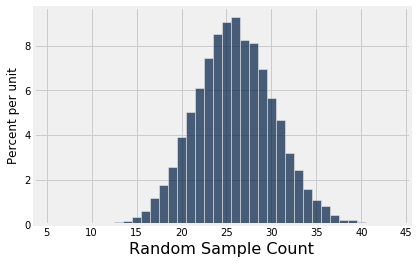

In [6]:
# Create a table and draw a histogram. The distribution is normal!
Table().with_column('Random Sample Count', counts).hist(bins = np.arange(5.5, 44.5, 1))
# The panel was not drawn by random!

## A Genetic Model: Mendel's Pea Flowers

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [11]:
# Purple to white ratio is 3 to 4. This is the model that we to need to choose random samples from
# Start with the percent of purple-flowering plants in the sample
# Statistic: | Sample percent of purple-flowering - 75 |
model = [0.75, 0.25]

In [12]:
sample_proportions(929, model)   # 929 is the sample size. Number of plants that Mendel grew

array([0.75134553, 0.24865447])

In [13]:
# Percent of purple flowering
percent_purple = (100 * sample_proportions(929, model)).item(0)

In [14]:
percent_purple

74.81162540365986

In [15]:
abs(percent_purple - 75)

0.18837459634013953

In [40]:
distances = []

repetitions = 10000
for i in np.arange(repetitions):
    one_distance = abs((100 * sample_proportions(929, model))[0] - 75)    # Sampling according to the model. Sample size is 929
    distances.append(one_distance)
round(np.median(distances), 2), round(np.mean(distances), 2)

(0.03, 0.01)

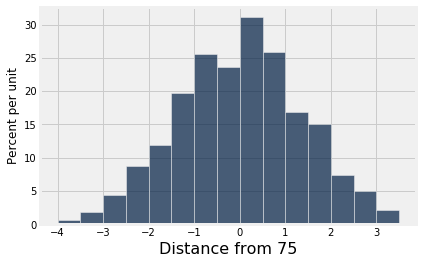

In [35]:
# Histogram if it is not the distance, i.e. if it is the absolute value between the sampled and the actual value. 
# The distribution is approximatly normal with mean around 0
Table().with_column('Distance from 75', distances).hist(bins = np.arange(-4,4,0.5))

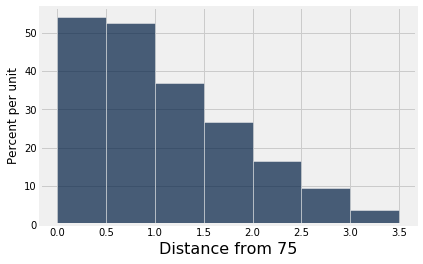

In [39]:
# Distance. Right distribution with majority of distances less than 1
Table().with_column('Distance from 75', distances).hist(bins = np.arange(0,4,0.5))

In [30]:
# Mendel got 705 purple-flowering out of the 929 flowers he grew.
round(abs(100*(705 / 929) - 75), 2)    # It is almost 75%. It looks great for the model! 
                                       #  Mendel's data and the model are consitent. The model is looking great!

0.89